In [3]:
# !pip3 install librosa

In [18]:
import librosa
import numpy as np
from scipy.io import wavfile
# import IPython.display as ipd
from IPython.display import Audio
import matplotlib.pyplot as plt
import scipy.signal as sp
from scipy.signal import butter, lfilter, freqz

In [19]:
s, sr = librosa.load('v5.wav', sr=16000)

In [31]:
frames = 2048
window_func = np.hanning

In [21]:
Audio(s, rate=sr)

In [10]:
def plot_wavform(s):
    fig = plt.figure(figsize=(10, 5))
    plt.plot(s)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Wavform of signal')

In [11]:
def plot_spectrogram(s, sr):
    stft = np.abs(librosa.stft(s))
    fig = plt.figure(figsize=(10, 5))
    plt.specgram(s, Fs=sr)
    # plt.imshow(stft, interpolation='nearest')
    plt.xlabel('Time')
    plt.ylabel('Frequencies')
    plt.title('Spectrogram of signal')

In [16]:
# plot_wavform(s)

In [15]:
# plot_spectrogram(s, sr)

In [34]:
def fft_convolution(x, h, K=None):
    Nx = x.shape[0]
    Nh = h.shape[0]
    Ny = Nx + Nh - 1

    if K is None:
        K = next_power_of_2(Ny)

    X = np.fft.fft(pad(x, K))
    H = pad(h, K)

    Y = np.multiply(X, H)
    y = np.real(np.fft.ifft(Y))
    return y[:Ny]

In [35]:
def pad(x, new_length):
    output = np.zeros((new_length,))
    output[:x.shape[0]] = x
    return output

In [36]:
def next_power_of_2(n):
    return 1 << (int(np.log2(n - 1)) + 1)

In [33]:
def equalize(s, window_func, B, h, K=None):
    M = len(s)
    N = len(h)

    num_input_blocks = np.ceil(M / B).astype(int)

    xp = pad(s, num_input_blocks*B)

    output_size = num_input_blocks * B + N - 1
    y = np.zeros((output_size,))
    for n in range(num_input_blocks):
        xb = xp[n*B:(n+1)*B]
        window = window_func(xb.shape[0])
        xb *= window
        
        u = fft_convolution(xb, h, K)

        y[n*B:n*B+len(u)] += u

    return y[:M+N-1]

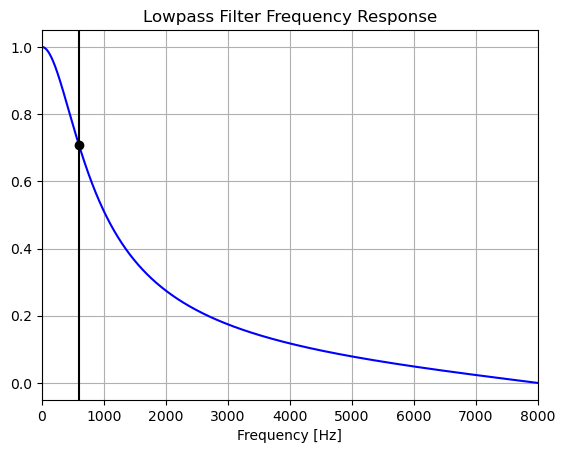

In [72]:
order = 1
cutoff = 600
btype='lowpass'
b, a = butter(order, cutoff, fs=sr, btype=btype, analog=False)
w, h = freqz(b, a, fs=sr, worN=sr//2)

plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*sr)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

In [73]:
y = equalize(s, window_func, frames, h)

/var/folders/rn/7sqr__617rb3kq3gr1qt3x5w0000gp/T/ipykernel_27211/859579504.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  output[:x.shape[0]] = x


In [74]:
len(y)

249673

In [75]:
Audio(y, rate=sr)

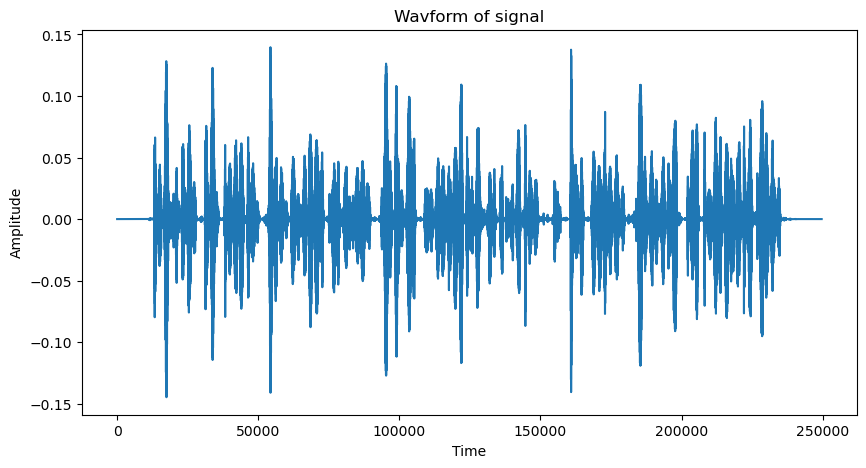

In [50]:
plot_wavform(y)

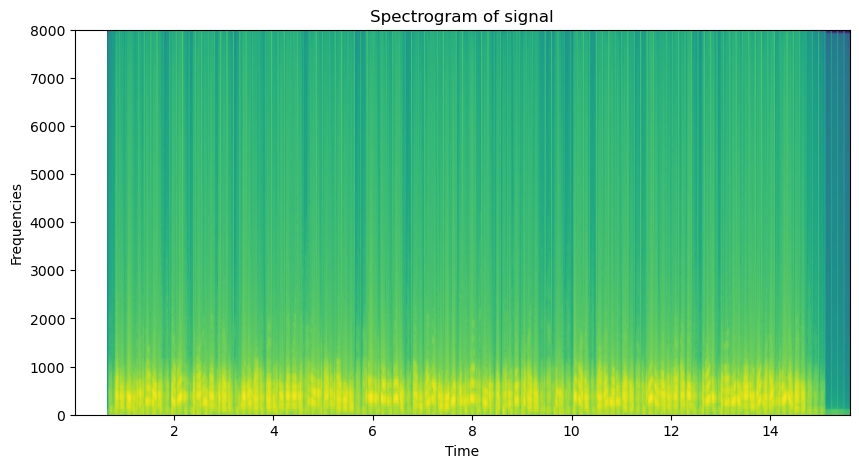

In [51]:
plot_spectrogram(y, sr)